In [2]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix


In [3]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)
    


# Support Vector Classifier

### Default Model

In [3]:
svm_1 = svm.SVC(random_state=43)
svm_1.fit(features_train, labels_train)
ypred = svm_1.predict(features_test)
accuracy_score(ypred, labels_test)

0.937125748502994

In [4]:
accuracy_score(svm_1.predict(features_train), labels_train)

0.9984143763213531

In [6]:
svm_1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 43,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Grid Search CV

In [5]:
svm_2 = svm.SVC(random_state=36)

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] #8 options
gamma = [0.0001, 0.001, 0.01, 1, 10, 100, 1000] #7 options
degree = [2, 3, 4, 5] #4 options
kernel_p = ["poly"]
kernel = ["rbf", "linear"]

#random_param = {"C" : C, "gamma" : gamma, "degree": degree, "kernel" : kernel_p}


param_grid = [{"C" : C, "gamma" : gamma, "degree": degree, "kernel" : kernel_p},
               {"C" : C, "gamma" : gamma, "kernel" : kernel}]


In [6]:
svm_3 = svm.SVC(random_state=10)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 8)

svm_grid = GridSearchCV(estimator=svm_3,
                       param_grid = param_grid, 
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = cv_sets,
                       verbose = 1)
svm_grid.fit(features_train, labels_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  4.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=8, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=10, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5],
                          'gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                          'kernel': ['poly']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                          'kernel': ['rb

In [49]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(svm_grid.best_score_, svm_grid.best_params_))

best_model = svm_grid.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.962874251497006
Bests Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Training Accuracy: 1.0
Test Accuracy: 0.9443447037701975


#### Classification Report

In [9]:
print(classification_report(labels_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       116
           1       0.93      0.93      0.93       107
           2       0.94      0.91      0.92        99
           3       0.98      0.98      0.98       138
           4       0.97      0.94      0.95        97

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



#### Confusion Matrix

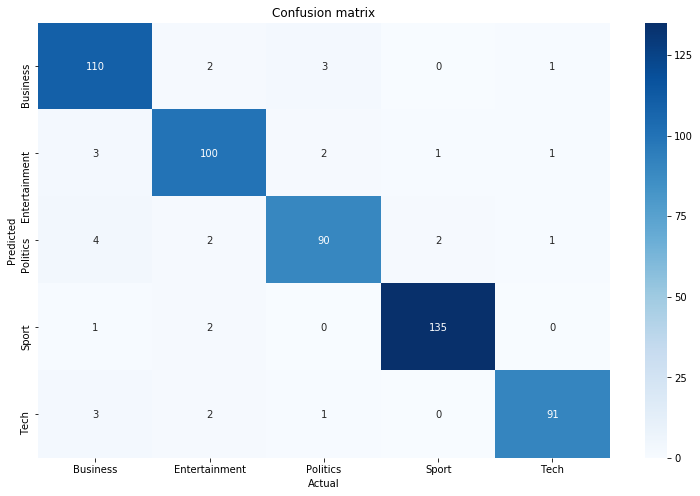

In [10]:
aux_df = data[['Category', 'Category_codes']].drop_duplicates().sort_values('Category_codes')
conf_matrix = confusion_matrix(labels_test, ypred)

plt.figure(figsize=(12.8,8))
ax = sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues",
                fmt = "g")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [5]:
best_model = svm.SVC(random_state=10,
                    C = 10,
                    gamma = 1,
                    kernel = 'rbf')

In [7]:
best_model.fit(features_train, labels_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
ypred = best_model.predict(features_test)

We will create a dataframe with Model Name, Training Accuracy and Test Accuracy to compare later

In [17]:
models_summary = pd.DataFrame({"Model Name:" : ["Support Vector Machine"],
     "Training Accuracy" : [accuracy_score(labels_train, best_model.predict(features_train))],
     "Test Accuracy" : [accuracy_score(labels_test, ypred)]}, index = [2])

In [21]:
models_summary

,Model Name:,Training Accuracy,Test Accuracy
2,Support Vector Machine,1.0,0.944345


In [37]:
with open("Models//models_summary.pickle", "rb") as file:
    all_models_summary = pickle.load(file)
all_models_summary = all_models_summary.append(models_summary)
all_models_summary

,Model Name:,Training Accuracy,Test Accuracy
0,Random Forest Classifier,1.0,0.960503
1,Gradient Boosting Classifier,1.0,0.958707
2,Support Vector Machine,1.0,0.944345


In [38]:
with open("Models//models_summary.pickle", "wb") as output:
    pickle.dump(all_models_summary, output)

In [36]:
with open("Models//best_svm.pickle", "wb") as output:
    pickle.dump(best_model, output)
    